# **Домашнее задание по теме "Проблема качества данных"**

**Задание:**

**Цель:** применить на практике методы по оценке качества данных.

**Описание задания:**

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по [ссылке](https://www.kaggle.com/hesh97/titanicdataset-traincsv) или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
    
    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
    
6. Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.

    a) Удалите выбросы, если считаете это целесообразным. Обоснуйте
    .
8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.
    a) Кратко опишите какие преобразования были сделаны и почему.
    b) Сравните метрики моделей из п. 2 и п. 10.
    c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
    
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

**Форма выполнения:**

ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:
Jupyter Notebook/Google Colab;
GitHub;
датасет.
Срок выполнения: дедлайн приема решений на проверку

**Рекомендации к выполнению:**

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

**Решение:**

In [ ]:
# Загрузим необходимые переменные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Получите и загрузите данные.

In [ ]:
# Загрузим данные
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В данном датафрейме есть как категориальные, так и числовые признаки:

Категориальные признаки:

* Survived: Выжил или нет (0- не выжил, 1 - выжил) - является бинарным категориальным признаком, принимающим значения 0 и 1.
* Pclass:класс пассажира (1 — высший, 2 — средний, 3 — низший)  является категориальным признаком, принимающим значения 1, 2 и 3.
* Sex: пол (мужской, женский) - вляется категориальным признаком, принимающим значения "male" и "female".
* Embarked: порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон): Является категориальным признаком, принимающим значения "C", "Q" и "S".
* Cabin: каюта - является категориальным признаком, представляющим номер каюты пассажира.
* Ticket: номер билета - является категориальным признаком, представляющим номер билета пассажира.
* Name: имя - является категориальным признаком, представляющим имя и фамилию пассажира.

Числовые признаки:

* PassengerId - ID пассажира
* Age: возраст - является числовым признаком, представляющим возраст пассажира.
* SibSp: количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника - является числовым признаком, представляющим количество супругов/братьев/сестер пассажира на борту.
* Parch: количество родителей, детей (в том числе приемных) на борту титаника - является числовым признаком, представляющим количество родителей/детей пассажира на борту.
* Fare - является числовым признаком, представляющим стоимость билета пассажира.

Признаки "Cabin" и "Ticket", могут содержать как числовые, так и текстовые значения. Поэтому могут потребовать дополнительной обработки.

# 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
# Посмотрим на типы данных и наличие пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Пропущенные значения
for column in df.columns:
    nan_values = df[column].isnull().sum()
    print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")

В столбце 'PassengerId' есть 0 пропущенных значений (NaN)
В столбце 'Survived' есть 0 пропущенных значений (NaN)
В столбце 'Pclass' есть 0 пропущенных значений (NaN)
В столбце 'Name' есть 0 пропущенных значений (NaN)
В столбце 'Sex' есть 0 пропущенных значений (NaN)
В столбце 'Age' есть 177 пропущенных значений (NaN)
В столбце 'SibSp' есть 0 пропущенных значений (NaN)
В столбце 'Parch' есть 0 пропущенных значений (NaN)
В столбце 'Ticket' есть 0 пропущенных значений (NaN)
В столбце 'Fare' есть 0 пропущенных значений (NaN)
В столбце 'Cabin' есть 687 пропущенных значений (NaN)
В столбце 'Embarked' есть 2 пропущенных значений (NaN)


In [ ]:
# Уникальные значения:
for column in df.columns:
    unique_values = df[column].unique()
    # ограничение вывода уникальных значений до первых 5
    unique_values = unique_values[:20]

    print(f"В столбце '{column}' есть {unique_values} уникальные значения")


В столбце 'PassengerId' есть [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] уникальные значения
В столбце 'Survived' есть [0 1] уникальные значения
В столбце 'Pclass' есть [3 1 2] уникальные значения
В столбце 'Name' есть ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] уникальные значения
В столбце 'Sex' есть ['male' 'female'] уникаль

In [ ]:
# Удалим пропущенные значения (NaN)
df.dropna(inplace=True)

In [ ]:
import string
exc = string.punctuation
df.columns.str.strip(exc).astype(bool).any()

True

In [ ]:
# Удалим категориальные переменные
df.drop(['Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
1,2,1,38.0,1,0,71.2833
3,4,1,35.0,1,0,53.1000
6,7,0,54.0,0,0,51.8625
10,11,1,4.0,1,1,16.7000
11,12,1,58.0,0,0,26.5500


In [ ]:
X = df.drop('Survived', axis=1)
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy_train1 = accuracy_score(y_train, model.predict(X_train))
accuracy_test1 = accuracy_score(y_test, model.predict(X_test))

print(f'Accuracy на обучающей выборке: {accuracy_train1:.2f}')
print(f'Accuracy на тестовой выборке: {accuracy_test1:.2f}')



Accuracy на обучающей выборке: 0.72
Accuracy на тестовой выборке: 0.68


In [ ]:
from sklearn.metrics import classification_report
m1 = classification_report( y_test, lr.predict(X_test) )
print(m1)

              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.66      1.00      0.79        23

    accuracy                           0.68        37
   macro avg       0.83      0.57      0.52        37
weighted avg       0.79      0.68      0.59        37



In [ ]:
# Построим кривую ROC AUC
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

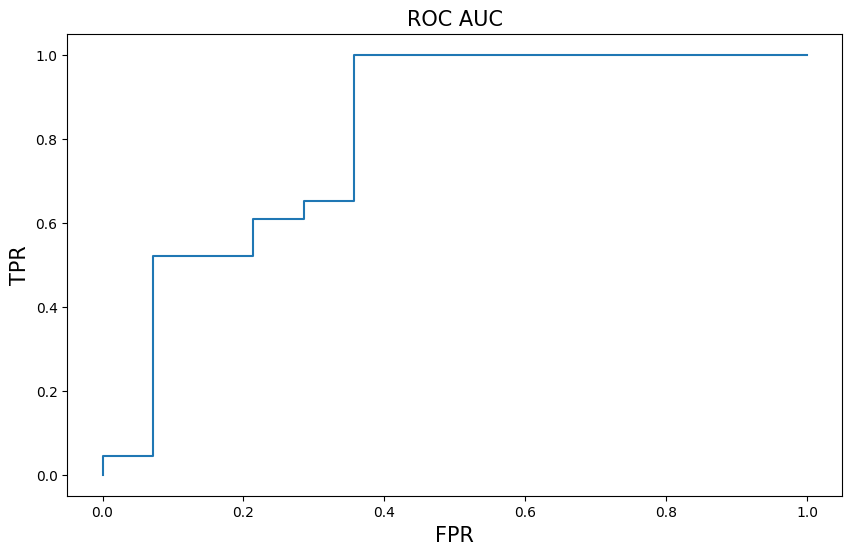

In [ ]:
# Визуализируем
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

In [ ]:
ROC_AUC_1 = roc_auc_score(y_test, predictions[:, 1])
ROC_AUC_1

0.81055900621118

# 3. Снова загрузите полные данные.

In [ ]:
df1 = pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

Для построения модели не нужны столбцы **PassengerId**, **Name**,**Ticket** и **Cabin**, содержащие ID пассажира, номер билета и каюты соответственно. **PassengerId** - это идентификационный номер: не несет смысловой нагрузки, **Name**  - это категориальная переменная, которая содержит персональные данные пассажира и не влияет на целевую переменную. **Ticket** отражает категорию пассажира, однако требуется много информации для интерпретации, которой я не обладаю. **Cabin** обозначает каюту, по сути положение на корабле, что несомненно играло роль в шансах на выживание, но данных для данного столбца всего 23%, поэтому этот столбец также исключаю.

In [ ]:
df1=df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 5. Проверьте данные на наличие пропущенных значений.

In [ ]:
# Посмотрим количество пропусков
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


#### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [ ]:
# Расчитаем процент пропусков
missing_percent = df1.isnull().sum() / len(df1) * 100
print(f'Процент пропущенных данных:\n{missing_percent}')

Процент пропущенных данных:
Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64


#### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [ ]:
df1.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [ ]:
# Age заменим на медианное значение
df1.loc[df1.Age.isna(), 'Age'] = df1.Age.median()
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# Embarked заменим на модальное значение (выберем самый распространенный порт отправки)
df1.Embarked.mode()

,Embarked
0,S


In [ ]:
df1.loc[df1.Embarked.isna(), 'Embarked'] = df1.Embarked.mode().get(0)
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# 6. Категориальные переменные переведите в цифровые значения.

In [ ]:
X = pd.get_dummies(df1.drop('Survived', axis=1))
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(df1.Survived)
y.shape

(891,)

# 7. Проверьте данные на наличие выбросов.

In [ ]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Похожие на выбросы значения могут быть только в столбце **Fare**. В столбце
 **Age** разброс данных обусловлен особенностями их распределения.
 Чтобы это понять, необходимо визуализировать.

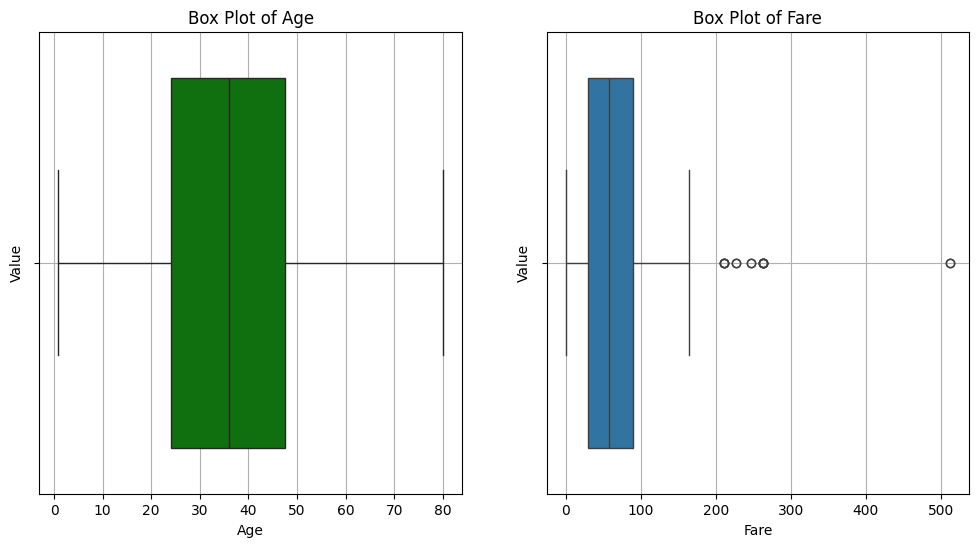

In [ ]:
# Создание фигуры с двумя осями
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Визуализация распределения признака "Age"
sns.boxplot(x=df['Age'], ax=ax1, color = "green")
ax1.set_title('Box Plot of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Value')
ax1.grid(True)

# Визуализация распределения признака "Fare"
sns.boxplot(x=df['Fare'], ax=ax2)
ax2.set_title('Box Plot of Fare')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Value')
ax2.grid(True)

plt.show()

В признаке **Fare** присутствуют некоторые выбросы, которые, вероятно, отражают реальные различия в стоимости билетов. Удалять их не обязательно, поскольку они отображают реальные данные.

# 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [ ]:
# Посмотрим, есть ли корреляция между полом пассажира и шансами на выживание
df1.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

[Text(0.5, 1.0, 'Соотношение числа выживших и погибших в зависимости от пола')]

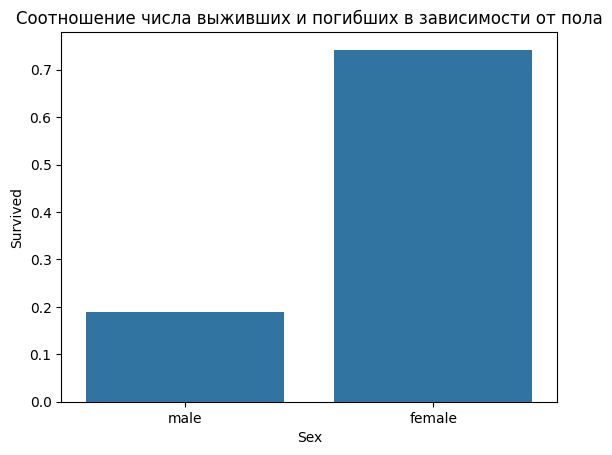

In [ ]:
# Визуализируем
sns.barplot(x='Sex', y='Survived', data=df1, errorbar=None).set(title="Соотношение числа выживших и погибших в зависимости от пола")

График показывает, что у женщин было больше шансов спастись.

[Text(0.5, 1.0, 'Распределение выживших и погибших по возрасту')]

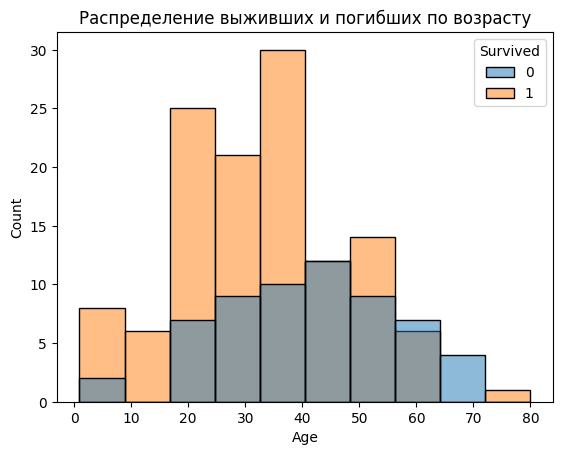

In [ ]:
# # Посмотрим, есть ли корреляция между возрастом пассажира и шансами на выживание
sns.histplot(data=df, x='Age', hue='Survived').set(title="Распределение выживших и погибших по возрасту")

График показывает, что больше шансов спастись было у людей в возрасте от 20 до 40 лет.

In [ ]:
# Посмотрим, есть ли корреляция между классом пассажира и шансами на выживание
df1.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

[Text(0.5, 1.0, 'Соотношение числа выживших и погибших в зависимости от класса')]

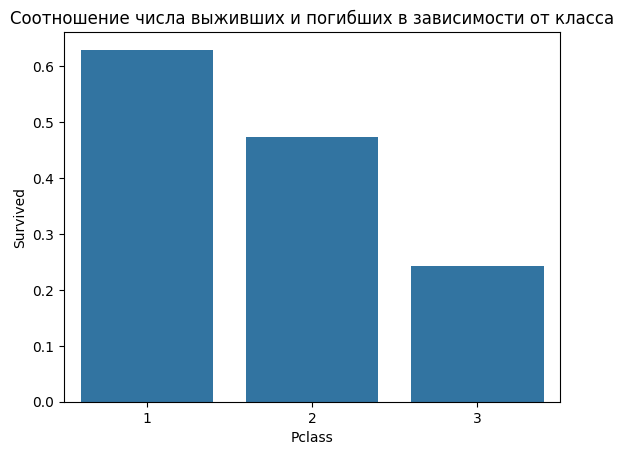

In [ ]:
# Визуализируем
sns.barplot(x='Pclass', y='Survived', data=df1, errorbar=None).set(title="Соотношение числа выживших и погибших в зависимости от класса")

График показывает, что, вероятнее всего, сначала в шлюпки сажали пассажиров 1 класса, затем 2-го и только потом 3-го. Поскольку шлюпок на всех не хватало, то в большей степени пострадали те, кто относился к 3 классу.

# 9. Попробуйте математически преобразовать признак Age.

Т.к. разброс по возрасту достаточно большой - разобьем данные по возрастным группам.

In [ ]:
df1.Age[df1.Age < 10.0] = 0
df1.Age[(df1.Age >= 10.0) & (df1.Age < 20.0)] = 1.0
df1.Age[(df1.Age >= 20.0) & (df1.Age < 30.0)] = 2.0
df1.Age[(df1.Age >= 30.0) & (df1.Age < 40.0)] = 3.0
df1.Age[(df1.Age >= 40.0) & (df1.Age < 50.0)] = 4.0
df1.Age[(df1.Age >= 50.0) & (df1.Age < 60.0)] = 5.0
df1.Age[df1.Age >= 60.0] = 6.0
df1.head(10)

<ipython-input-32-3dd7def8b851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age[df1.Age < 10.0] = 0
<ipython-input-32-3dd7def8b851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age[(df1.Age >= 10.0) & (df1.Age < 20.0)] = 1.0
<ipython-input-32-3dd7def8b851>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age[(df1.Age >= 20.0) & (df1.Age < 30.0)] = 2.0
<ipython-input-32-3dd7def8b851>:4: SettingWithCopyWarning: 
A va

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,2.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,2.0,0,0,7.9250,S
3,1,1,female,3.0,1,0,53.1000,S
4,0,3,male,3.0,0,0,8.0500,S
5,0,3,male,2.0,0,0,8.4583,Q
6,0,1,male,5.0,0,0,51.8625,S
7,0,3,male,0.0,3,1,21.0750,S
8,1,3,female,2.0,0,2,11.1333,S
9,1,2,female,1.0,1,0,30.0708,C


# 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy_train2 = accuracy_score(y_train, model.predict(X_train))
accuracy_test2 = accuracy_score(y_test, model.predict(X_test))

print(f'Accuracy на обучающей выборке: {accuracy_train2:.2f}')
print(f'Accuracy на тестовой выборке: {accuracy_test2:.2f}')

Accuracy на обучающей выборке: 0.79
Accuracy на тестовой выборке: 0.81


In [ ]:
m3 = classification_report( y_test, model.predict(X_test) )
print(m3)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
# Построим кривую ROC AUC
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

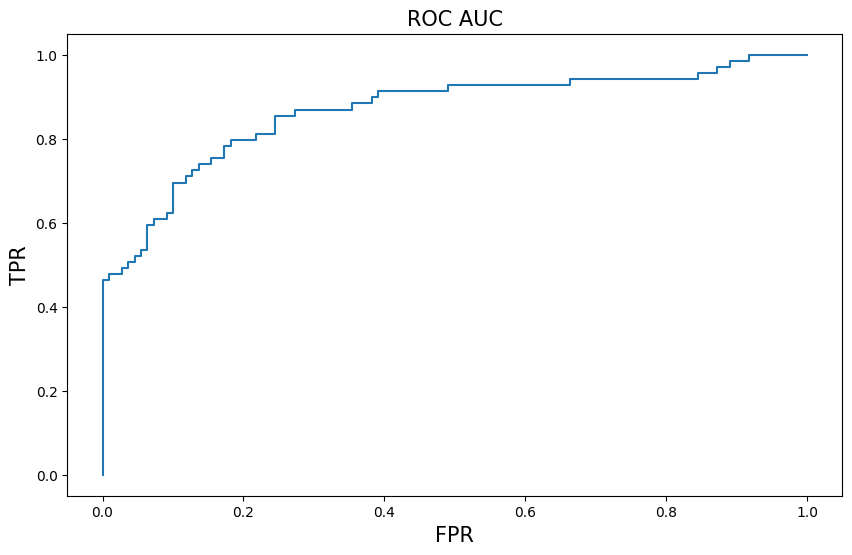

In [ ]:
# Визуализируем
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('FPR', fontdict={'fontsize': 15})
plt.ylabel('TPR', fontdict={'fontsize': 15})
plt.show()

In [ ]:
ROC_AUC_2=roc_auc_score(y_test, predictions[:, 1])
ROC_AUC_2

0.8667984189723319

# 11. Сформулируйте выводы по проделанной работе.

### a) Кратко опишите какие преобразования были сделаны и почему.

В рамках предобработки данных были произведены следующие действия:

* удалены столбцы **PassengerId**, **Name** и **Ticket**, т.к. они не содержат информации, влияющей на то, выжил пассажир или нет;

* удален столбец **Cabine**, т.к. он заполнен менее, чем на 30%;

* заполнены пропуски, с использованием медианного и модального значения, т.к. удаление пропусков лишило бы нас 20% данных;

* категориальные переменные переведены в численные значения для обеспечения работы модели;

* признак **Age** разделен на категории из-за большого разброса значений.

### b) Сравните метрики моделей из п. 2 и п. 10.

In [ ]:
print(f'Преобразования, проведенные над данными и подбор оптимальных параметров \
модели позволили улучшить метрику accuracy на {round(accuracy_test2-accuracy_test1, 4)*100}%.'),
print(f'А метрику roc_auc_score  - улучшить на {round(ROC_AUC_2-ROC_AUC_1, 4)*100}%')

Преобразования, проведенные над данными и подбор оптимальных параметров модели позволили улучшить метрику accuracy на 13.44%.
А метрику roc_auc_score  - улучшить на 5.62%


### c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?

Работа с данными обязательна для построения эффективной модели машинного обучения. Сортировка признаков, выбор необходимых атрибутов для построения модели, качественная работа с пропусками и некачественными данными является залогом создания эффективной модели машинного обучения.

Действительно большие данные также следует исследовать и выявлять в них возможные корреляции. Что касается работы с пропусками и некачественными данными, то здесь необходимо соотносить объем затраченных ресурсов и потенциальный объем обновленных данных. Если последний незначителен, а обработка очень трудоемка или затратна по времени, то в некоторых ситуациях будет лучше такие данные опустить и не брать во внимание при создании модели.